<a href="https://colab.research.google.com/github/haaris519/Python-Proti/blob/main/REAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-2-55152992aad1>:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  real_time_workforce_data.fillna(method="ffill", inplace=True)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


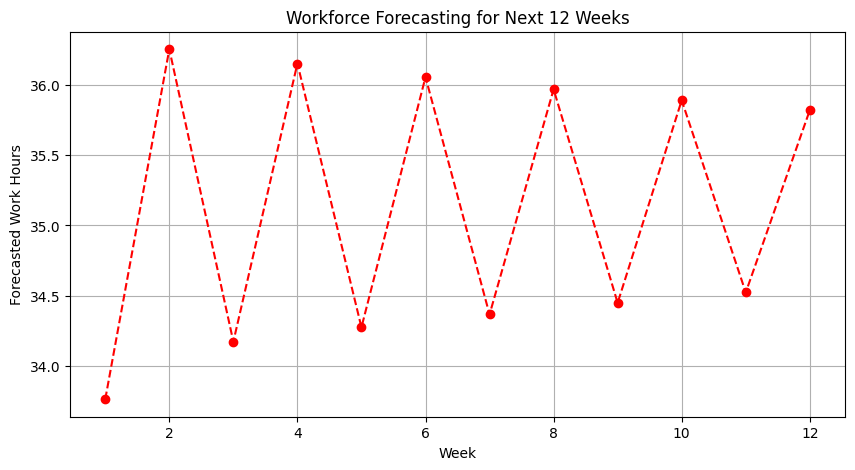

<ipython-input-2-55152992aad1>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=shift_distribution.index, y=shift_distribution.values, palette="viridis")


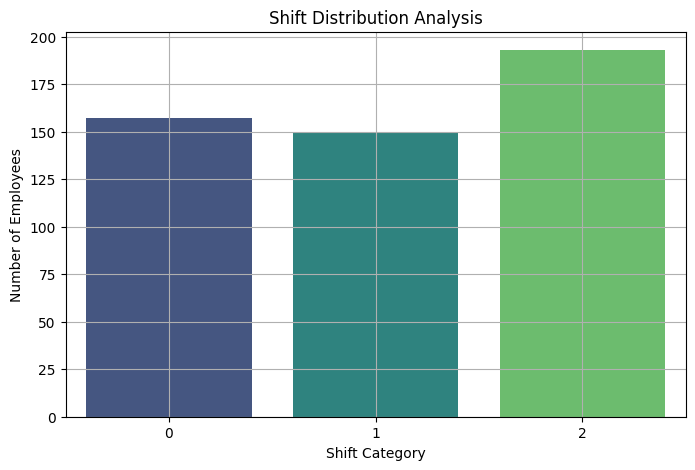

<ipython-input-2-55152992aad1>:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=absenteeism_impact.index, y=absenteeism_impact.values, palette="coolwarm")


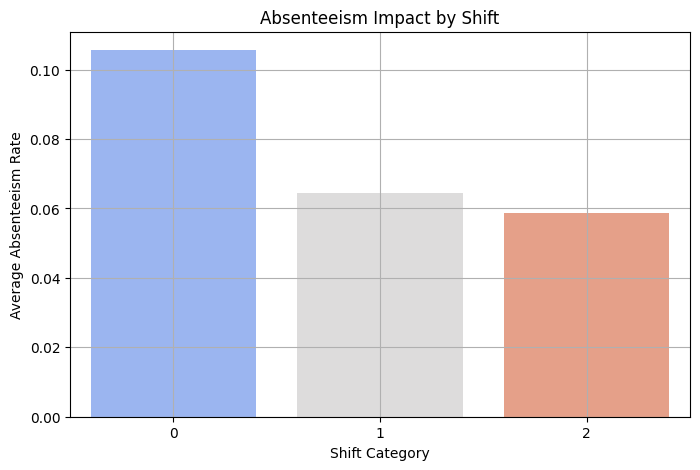

<ipython-input-2-55152992aad1>:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=call_volume_impact.index, y=call_volume_impact.values, palette="magma")


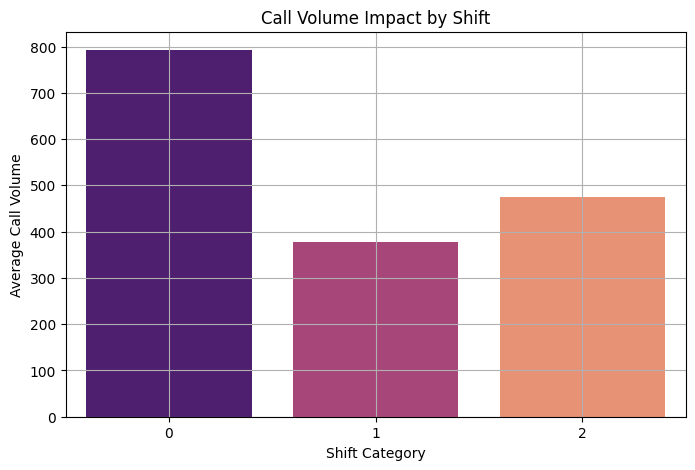

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.stattools import adfuller

real_time_workforce_data = pd.read_csv("/content/real_time_workforce_data.csv")

real_time_workforce_data.fillna(method="ffill", inplace=True)


scaler = StandardScaler()
scaled_features = scaler.fit_transform(real_time_workforce_data[["work_hours_week", "absenteeism_rate", "call_volume_week"]])

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
real_time_workforce_data["Shift_Category"] = kmeans.fit_predict(scaled_features)

adf_test = adfuller(real_time_workforce_data["work_hours_week"])
if adf_test[1] > 0.05:
    print("⚠️ Data is not stationary. Differencing will be applied.")
    real_time_workforce_data["work_hours_week"] = real_time_workforce_data["work_hours_week"].diff().dropna()

model = ARIMA(real_time_workforce_data["work_hours_week"], order=(2,1,2))
model_fit = model.fit()

# Forecast work hours for the next 12 weeks
forecast_steps = 12
workforce_forecast = model_fit.forecast(steps=forecast_steps)

# 📌 Prepare forecast results
forecast_df = pd.DataFrame({"Week": range(1, forecast_steps + 1), "Forecasted_Work_Hours": workforce_forecast})
forecast_df.to_csv("workforce_forecast_tiktok.csv", index=False)

# 📌 Scheduling Optimization Analysis (Checking if workload is balanced across shifts)
shift_distribution = real_time_workforce_data["Shift_Category"].value_counts()
shift_distribution.to_frame().to_csv("shift_distribution_tiktok.csv")

# 📌 Capacity Planning Analysis (Impact of absenteeism and call volume on workforce efficiency)
absenteeism_impact = real_time_workforce_data.groupby("Shift_Category")["absenteeism_rate"].mean()
call_volume_impact = real_time_workforce_data.groupby("Shift_Category")["call_volume_week"].mean()

# Save absenteeism and call volume impact
absenteeism_impact.to_frame().to_csv("absenteeism_impact_tiktok.csv")
call_volume_impact.to_frame().to_csv("call_volume_impact_tiktok.csv")

# 📌 Plot Workforce Forecasting
plt.figure(figsize=(10, 5))
plt.plot(range(1, forecast_steps + 1), workforce_forecast, marker="o", linestyle="dashed", color="red")
plt.xlabel("Week")
plt.ylabel("Forecasted Work Hours")
plt.title("Workforce Forecasting for Next 12 Weeks")
plt.grid(True)
plt.show()

# 📌 Plot Shift Distribution Analysis
plt.figure(figsize=(8, 5))
sns.barplot(x=shift_distribution.index, y=shift_distribution.values, palette="viridis")
plt.xlabel("Shift Category")
plt.ylabel("Number of Employees")
plt.title("Shift Distribution Analysis")
plt.grid(True)
plt.show()

# 📌 Plot Absenteeism Impact by Shift
plt.figure(figsize=(8, 5))
sns.barplot(x=absenteeism_impact.index, y=absenteeism_impact.values, palette="coolwarm")
plt.xlabel("Shift Category")
plt.ylabel("Average Absenteeism Rate")
plt.title("Absenteeism Impact by Shift")
plt.grid(True)
plt.show()

# 📌 Plot Call Volume Impact by Shift
plt.figure(figsize=(8, 5))
sns.barplot(x=call_volume_impact.index, y=call_volume_impact.values, palette="magma")
plt.xlabel("Shift Category")
plt.ylabel("Average Call Volume")
plt.title("Call Volume Impact by Shift")
plt.grid(True)
plt.show()
